# Particle Swarm Optimization (PSO) implementation in Python

## Libraries importation

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

## Write a function that compute f(x1, x2) = F2(x1, x2) (Rosenbrock)

In [3]:
def rosenbrock_function(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

## Display f(x1, x2) where x1 and x2 are in [-5, 5] with pyplot

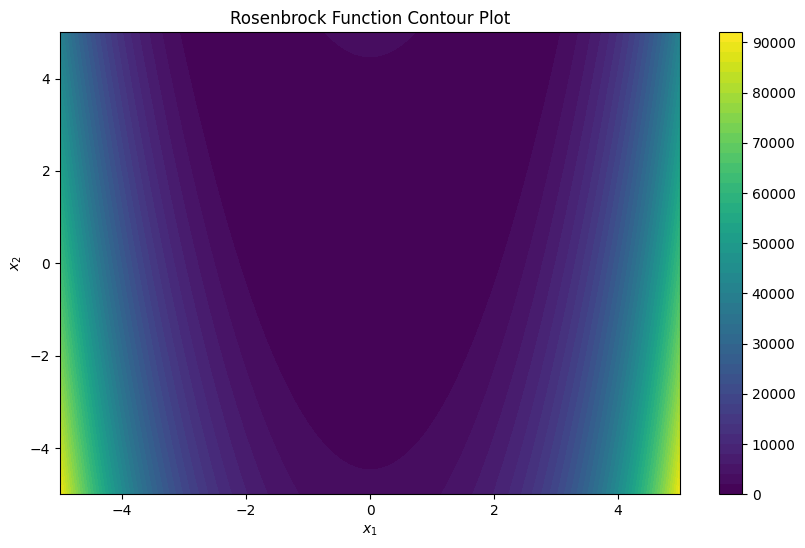

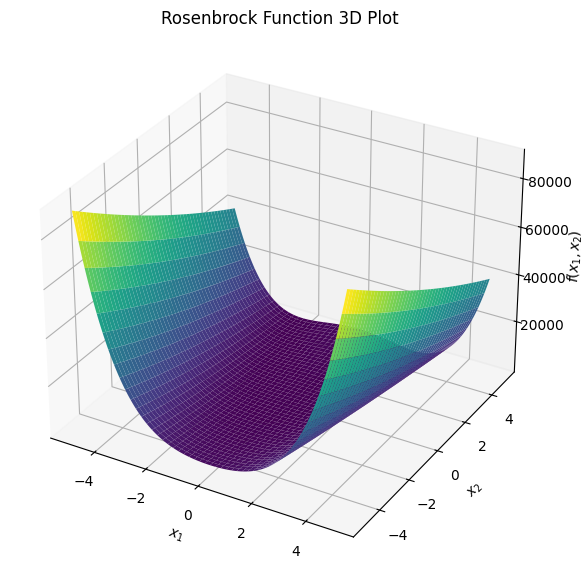

In [4]:
# Create a grid of values for x1 and x2
x1 = np.linspace(-5, 5, 400)
x2 = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1, x2)

# Compute the Rosenbrock function values over the grid
Z = rosenbrock_function([X1, X2])

# Plot the Rosenbrock function in 2D
plt.figure(figsize=(10, 6))
cp = plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Rosenbrock Function Contour Plot')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

# Plot the Rosenbrock function in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')
ax.set_title('Rosenbrock Function 3D Plot')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
plt.show()

## Write the PSO (Particle Swarm Optimization) algorithm with the following parameters:
- Cost function: F2
- Number of particles: N
- Weight: w
- Cognitive constant: c1
- Social constant: c2
- Cost function dimension: D
- Maximum number of iterations: max_iter
    - Return the best solution found


In [5]:
def PSO(f, N, w, phi1, phi2, dim, max_iter):
    # Initialize the positions and velocities of the particles
    X = np.random.rand(N, dim) * 10 - 5  # Scale to [-5, 5]
    V = np.random.rand(N, dim) * 2 - 1   # Scale to [-1, 1]
    
    # Initialize the personal best positions and the global best position
    pbest = X.copy()
    pbest_val = np.array([f(x) for x in pbest])
    
    gbest = pbest[np.argmin(pbest_val)]
    gbest_val = min(pbest_val)
    
    k = 0  # Initialize iteration counter
    
    # History storage for animation
    history_positions = []
    history_values = []
    
    # Main optimization loop
    while k < max_iter:
        for i in range(N):
            # Random coefficients
            c1 = np.random.rand()
            c2 = np.random.rand()
            
            # Update velocity
            V[i] = w * V[i] + c1 * phi1 * (pbest[i] - X[i]) + c2 * phi2 * (gbest - X[i])
            
            # Update position
            X[i] = X[i] + V[i]
            
            # Calculate the cost for the new position
            cost = f(X[i])
            
            # Update personal best if the new cost is lower
            if cost < pbest_val[i]:
                pbest_val[i] = cost
                pbest[i] = X[i]
                
                # Update global best if the new cost is lower
                if cost < gbest_val:
                    gbest_val = cost
                    gbest = X[i]
        
        k += 1  # Increment iteration counter
        
        # Store history for animation
        history_positions.append(X.copy())
        history_values.append([f(x) for x in X])
        
    return gbest, gbest_val, history_positions, history_values

# Parameters
N = 30  # Number of particles
w = 0.5  # Inertia coefficient
phi1 = 1.5  # Cognitive (particle) coefficient
phi2 = 1.5  # Social (swarm) coefficient
dim = 2  # Dimension of the search space
max_iter = 100  # Maximum number of iterations

# Run PSO
best_position, best_value, history_positions, history_values = PSO(rosenbrock_function, N, w, phi1, phi2, dim, max_iter)
print(f"Best position: {best_position}")
print(f"Best value: {best_value}")

Best position: [1. 1.]
Best value: 4.674238163151346e-18


## Do animation of the PSO algorithm 

2024-05-28 15:32:33,999 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2024-05-28 15:32:34,000 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


Best position: [1. 1.]
Best value: 3.743950345123359e-20


/var/folders/y0/8vkbb8t13x706lcddt3g102w0000gn/T/ipykernel_3556/95329010.py:40: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  optimal_point.set_data(best_position[0], best_position[1])


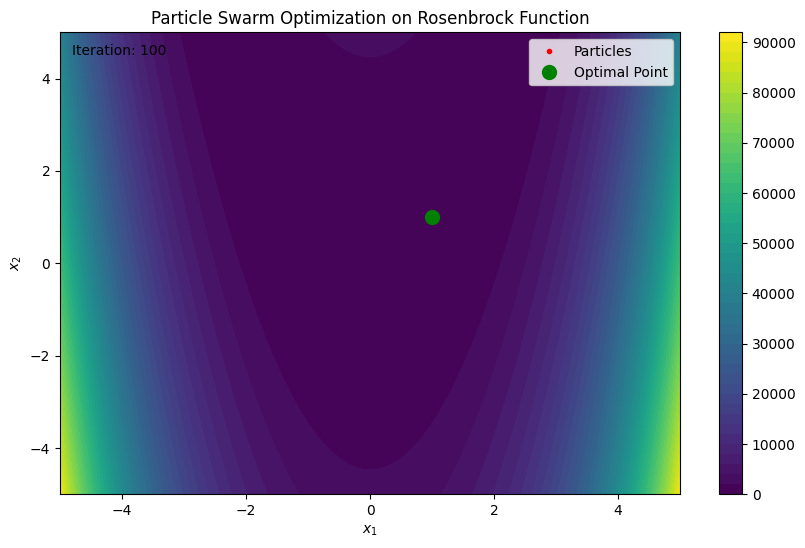

2024-05-28 15:32:37,145 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2024-05-28 15:32:37,146 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>
/var/folders/y0/8vkbb8t13x706lcddt3g102w0000gn/T/ipykernel_3556/95329010.py:84: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  optimal_point.set_data(best_position[0], best_position[1])


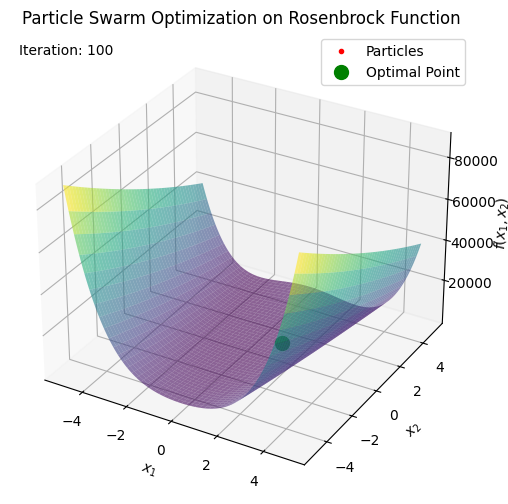

In [6]:
# Parameters
N = 30  # Number of particles
w = 0.5  # Inertia coefficient
phi1 = 1.5  # Cognitive (particle) coefficient
phi2 = 1.5  # Social (swarm) coefficient
dim = 2  # Dimension of the search space
max_iter = 100  # Maximum number of iterations

# Run PSO
best_position, best_value, history_positions, history_values = PSO(rosenbrock_function, N, w, phi1, phi2, dim, max_iter)
print(f"Best position: {best_position}")
print(f"Best value: {best_value}")

# 2D Plotting
x_vals = np.linspace(-5, 5, 400)
y_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x_vals, y_vals)
Z = rosenbrock_function([X1, X2])

fig, ax = plt.subplots(figsize=(10, 6))
cp = ax.contourf(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
particles, = ax.plot([], [], 'ro', label='Particles', markersize=3)
optimal_point, = ax.plot([], [], 'go', label='Optimal Point', markersize=10)
text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
    particles.set_data([], [])
    optimal_point.set_data([], [])
    text.set_text('')
    return particles, text, optimal_point

def update(frame):
    pos = history_positions[frame]
    particles.set_data(pos[:, 0], pos[:, 1])
    text.set_text(f'Iteration: {frame+1}')
    
    # Highlight the final optimal point
    if frame == len(history_positions) - 1:
        optimal_point.set_data(best_position[0], best_position[1])
    
    return particles, text, optimal_point

ani = FuncAnimation(fig, update, frames=len(history_positions), init_func=init, blit=True, repeat=False)
ani.save('pso_rosenbrock_2d.gif', writer='imagemagick', fps=10)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.title('Particle Swarm Optimization on Rosenbrock Function')
plt.legend()
plt.show()

# 3D Plotting
x_vals = np.linspace(-5, 5, 400)
y_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x_vals, y_vals)
Z = rosenbrock_function([X1, X2])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.6)

particles, = ax.plot([], [], [], 'ro', label='Particles', markersize=3)
optimal_point, = ax.plot([], [], [], 'go', label='Optimal Point', markersize=10)
text = ax.text2D(0.02, 0.95, '', transform=ax.transAxes)

def init():
    particles.set_data([], [])
    particles.set_3d_properties([])
    optimal_point.set_data([], [])
    optimal_point.set_3d_properties([])
    text.set_text('')
    return particles, text, optimal_point

def update(frame):
    pos = history_positions[frame]
    val = history_values[frame]
    particles.set_data(pos[:, 0], pos[:, 1])
    particles.set_3d_properties(val)
    text.set_text(f'Iteration: {frame+1}')
    
    # Highlight the final optimal point
    if frame == len(history_positions) - 1:
        optimal_point.set_data(best_position[0], best_position[1])
        optimal_point.set_3d_properties(rosenbrock_function(best_position))
    
    return particles, text, optimal_point

ani = FuncAnimation(fig, update, frames=len(history_positions), init_func=init, blit=True, repeat=False)
ani.save('pso_rosenbrock.gif', writer='imagemagick', fps=10)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
plt.title('Particle Swarm Optimization on Rosenbrock Function')
plt.legend()
plt.show()